# Classificação de Múltiplas Classes

O problema que vamos resolver neste exemplo é o de classificar imagens em escala de cinza de dígitos escritos à mão (28x28 pixels) em 10 diferentes categorias (0 até 9).

Para este problema vamos usar o conjunto de dados [MNIST](http://yann.lecun.com/exdb/mnist/), clássico na comunidade de Machine Learning. 

Trata-se de um conjunto de 60.000 imagens de treinamento e 10.000 imagens de teste, estabelecido pelo National Institute of Standards and Technology (NIST) na década de 80.

![img](https://raw.githubusercontent.com/the-akira/DeepLearning/master/Imagens/MNIST.png)

Podemos imaginar o MNIST como o "Hello World" de **Deep Learning**, nos auxiliando a aprender diversos conceitos importantes.

**Importante**: Em Machine Learning, uma *category* (categoria) em um problema de classificação é chamado de *class* (classe). *Data points* são chamados de *samples* (amostras). A *class* associada com um específico *sample* é chamado de *label* (rótulo).

Iniciaremos importando os módulos necessários para trabalharmos no problema

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

O conjunto de dados MNIST já vem pré-carregado na biblioteca Keras, no formato de quatro Numpy arrays.

Vamos então carregá-lo com o comando **load_data()**

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data();

**train_images** e **train_labels** formam o **training set**, que é o nosso conjunto de dados para treinamento de nosso modelo, em outras palavras, os dados que o modelo irá utilizar para aprender.

O modelo então será testado no **test set**, formado por **test_images** e **test_labels**.

As imagens estão codificadas como Numpy arrays, e os *labels* são um array de dígitos entre 0 e 9.

As imagens e labels possuem uma correspondência um-para-um.

Vamos então verificar os dados de treinamento

In [3]:
train_images.shape

(60000, 28, 28)

Como já é de nosso conhecimento, contamos com 60.000 imagens de dimensões 28x28 pixels

In [4]:
len(train_labels)

60000

Assim como, respectivamente contamos com 60.000 labels de 0 até 9

In [5]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [6]:
test_images.shape

(10000, 28, 28)

Também contamos com 10.000 imagens para teste com labels de 0 até 9

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Para uma melhor intuição, vamos selecionar apenas uma imagem do conjunto de treinamento e vamos usar a biblioteca **matplotlib** para visualizarmos ela

In [9]:
single_image = train_images[2]
single_image.shape

(28, 28)

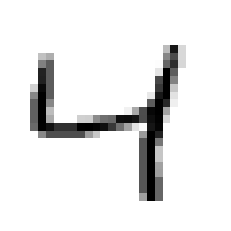

In [10]:
plt.imshow(single_image, cmap='binary');
plt.axis('off');

Neste exemplo, temos o número **4**, e a label referente a ela também é o número **4**, como já é de nosso conhecimento.

In [11]:
print(train_labels[2])

4


Agora que estamos familiarizados com os dados que iremos trabalhar, podemos definir nosso workflow:

- Primeiramente, iremos alimentar a rede neural (também chamada de modelo) com os dados de treinamento (**train_images** e **train_labels**)

- A rede neural então irá aprender a associar imagens com as labels

- Finalmente, pediremos a rede neural para produzir previsões para os dados de treinamento (**test_images**) e então iremos verificar se as previsões produzidas estão de acordo com as labels de **test_labels**.

Vamos então construir nosso modelo:

In [12]:
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

A estrutura principal das redes neurais é a *layer* (camada), um módulo de processamento de dados que podemos imaginar como um filtro para dados.

Dados entram nessa layer, são processados e saem de uma maneira útil.

Especificamente as layers extraem representações dos dados alimentados a elas.

A maior parte de Deep Learning consiste em encadear layers que irão implementar uma forma progressiva de *data distillation*.

Um modelo de Deep Learning é como uma peneira para o processo de dados, feito de uma sucessão de filtros de dados cada vez mais refinados: **as layers**.

Neste exemplo nossa rede neural consiste de uma sequência de duas [Dense layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), ao qual são densamente conectadas (também chamado na literatura de *fully connected*). A segunda (e última) layer é uma *[softmax](https://victorzhou.com/blog/softmax/)* layer com 10 neurônios, o que significa que ela irá retornar um array de 10 pontuações de probabilidade (somando no total 1). Cada pontuação será a probabilidade de que o dígito da imagem atual pertence a uma das 10 classes de dígitos (0 até 9).

Para tornarmos a rede neural pronta para o treinamento, precisaremos selecionar mais três elementos como parte da etapa de compilação:

- Uma **Função Loss**: Como a rede neural irá medir sua perfomance nos dados de treinamento de forma que ela possa guiá-la a si mesma na direção correta para os melhores resultados.
- Um **Optimizer**: O mecanismo pelo qual a rede neural irá atualizar a si mesma baseado nos dados que ela vê e sua **Função Loss**.
- **Métricas**: Para monitorar durante o treinamento e teste: Neste exemplo, iremos lidar apenas com *accuracy* (A fração de imagens que foram classificadas corretamente)

In [13]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Antes de iniciarmos o treinamento, iremos pré-processar os dados alterando sua forma (reshaping) em um formato que a rede neural aceita e iremos fazer o *scaling* dos dados de forma que eles fiquem no intervalo **[0,1]**.

Inicialmente nossas imagens de treinamento se encontram armazenadas em um array de forma (60000, 28, 28) do tipo **uint8** com valores no intervalo **[0,255]**.

Vamos transformá-los em um array **float32** de forma (60000, 28 * 28) com valores entre 0 e 1.

Também vamos codificar nossas labels categoricamente, em outras palavras, converteremos um vetor de classe (inteiros) em uma matriz de classe binária.

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [15]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Estamos agora aptos a treinar nossa rede neural, que em Keras significa chamarmos o método **fit()**

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128);

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2588 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1034 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0677 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0496 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0373 - accuracy: 0.9888


Durante o treinamento duas quantidades estão sendo apresentadas: o *loss* da rede neural sob os dados de treinamento e a *accuracy* da rede neural sob os dados de treinamento.

Neste exemplo fomos rapidamente capazes de obter uma *accuracy* de 0.9888 (98.8%) nos dados de treinamento.

Vamos então checar se o modelo é capaz de performar bem no conjunto de teste

In [17]:
network.metrics_names

['loss', 'accuracy']

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9807
test_loss: 0.0646529570221901
test_acc: 0.9807000160217285


A *accuracy* do conjunto de teste é 98%, um pouco inferior à *accuracy* do cojunto de treinamento.

Esta diferença entre *accuracy* de treinamento e teste é um exemplo do conhecido **overfitting**: o fato que modelos de machine learning tendem a ter uma perfomance inferior em novos dados em relação aos dados de treinamento.

Agora que nosso modelo foi treinado e avaliado, vamos selecionar apenas uma imagem do conjunto de teste e verificar se ele é capaz de fazer a previsão correta.

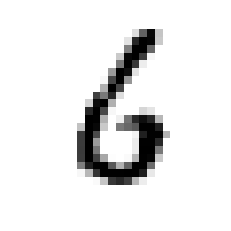

In [21]:
number = test_images[50]
plt.imshow(number.reshape(28,28),cmap='binary');
plt.axis('off');

Neste caso selecionamos o número **6**, e de fato, utilizando o método **predict()**, vemos que nosso modelo foi capaz de fazer a previsão correta.

In [22]:
network.predict(number.reshape(1,28*28)).argmax(axis=1)[0]

6